#### Exercise 6.3 (Page 9) 

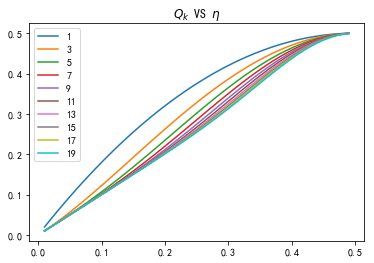

In [21]:
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np

#(b)
#计算Qk
def Q(k, x):
    s = 0
    for i in range(0, (k+1)//2):
        s1 = x ** (i + 1) * (1 - x) ** (k - i)
        s2 = (1 - x) ** (i + 1) * x ** (k - i)
        s += comb(k, i) * (s1 + s2)
    return s

x = np.arange(0.01, 0.5, 0.01)
K = np.arange(1, 20, 2)
for k in K:
    result = []
    for i in x:
        result.append(Q(k, i))
    plt.plot(x, result, label = str(k))
    plt.legend()
plt.title("$Q_k$ VS $\eta$")
plt.show()

#### Problem 6.1 (Page 42)

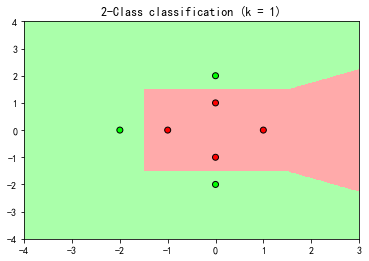

In [4]:
#(a)
import numpy as np
import helper as hlp

X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
y = np.array([-1, -1, -1, -1, 1, 1, 1])

knn = hlp.KNeighborsClassifier_(1)
knn.fit(X, y)
hlp.draw(X, y, knn)

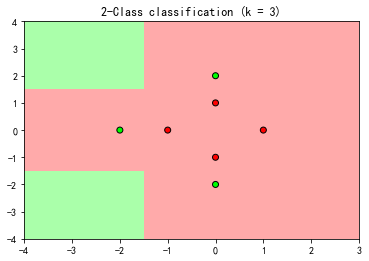

In [5]:
knn = hlp.KNeighborsClassifier_(3)
knn.fit(X, y)
hlp.draw(X, y, knn)

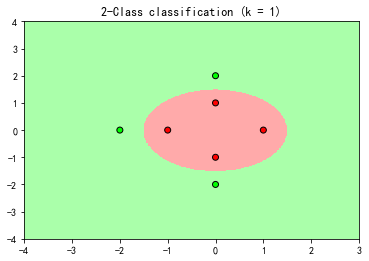

In [6]:
#(b)
#特征转换
Z = np.c_[np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2), np.arctan(X[:, 1] / (X[:, 0]  + 10**(-8)))]
knn = hlp.KNeighborsClassifier_(1)
knn.fit(Z, y)
hlp.draw(X, y, knn, flag=0)

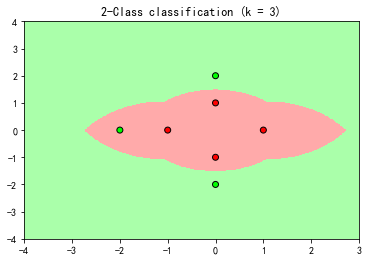

In [7]:
knn = hlp.KNeighborsClassifier_(3)
knn.fit(Z, y)
hlp.draw(X, y, knn, flag=0)

#### Problem 6.2 (Page 42)

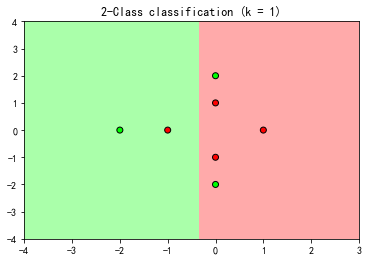

In [8]:
import numpy as np
import helper as hlp
    
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
y = np.array([-1, -1, -1, -1, 1, 1, 1])

#(a)
X1 = np.array([[np.mean(X[y>0][:, 0]), np.mean(X[y>0][:, 1])], [np.mean(X[y<0][:, 0]), np.mean(X[y<0][:, 1])]])
y1 = np.array([1, -1])

knn = hlp.KNeighborsClassifier_(1)
knn.fit(X1, y1)
hlp.draw(X, y, knn)

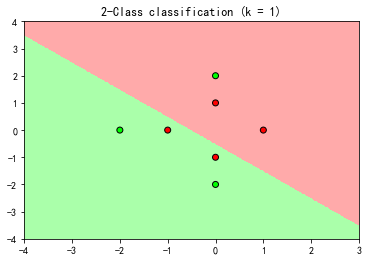

In [9]:
#(b)
def f(X):
    while(len(X) >1):
        #记录当前距离
        d = float('inf')
        #元素数量
        n = len(X)
        #记录最优元素的下标
        k = 0
        l = 0
        for i in range(n):
            for j in range(i+1, n):
                d1 = np.sum((X[i] - X[j])**2)
                if(d > d1):
                    d = d1
                    k = i
                    l = j
        #生成新的元素
        data = (X[k] + X[l]) / 2
        #删除元素
        X = np.delete(X, l, axis=0)
        X = np.delete(X, k, axis=0)
        #增加新元素
        X = np.append(X, data.reshape(-1, 2), axis=0)
    return X[0]

#划分数据
X_pos = X[y>0]
X_neg = X[y<0]

#新数据
X2 = np.array([f(X_pos), f(X_neg)])
y2 = np.array([1, -1])

knn = hlp.KNeighborsClassifier_(1)
knn.fit(X2, y2)
hlp.draw(X, y, knn)

#### Problem 6.4 (Page 42) 

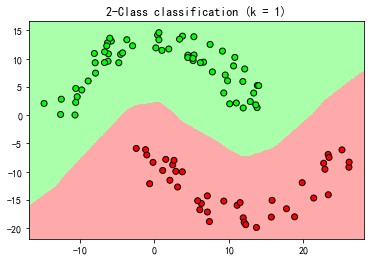

In [10]:
import helper as hlp

#Step1 产生数据
#参数
rad = 10
thk = 5
sep = 5

#产生数据
X, y = hlp.generatedata(rad, thk, sep, 100)

knn = hlp.KNeighborsClassifier_(1)
knn.fit(X, y)
hlp.draw(X, y, knn)

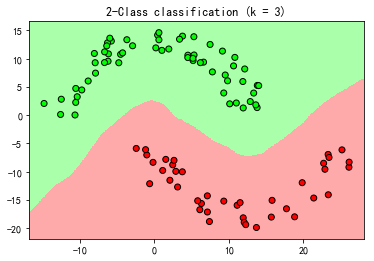

In [11]:
knn = hlp.KNeighborsClassifier_(3)
knn.fit(X, y)
hlp.draw(X, y, knn)

#### Problem 6.13 (Page 45)

(a)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp


#### (a)
def Data(n, flag=1, scale=0.15):
    """
    生成n个点，flag=1表示圆心固定
    """
    if flag:
        #中心
        center = np.array([[0, 1, 0, -1], [1, 0, -1, 0]]).T
    else:
        #按极坐标方式生成点
        theta = np.random.uniform(0, 2 * np.pi, size=4)
        center = np.c_[np.cos(theta), np.sin(theta)]
    #生成X
    X = np.random.normal(scale=scale, size=(n, 2))
    #生成每个数据对应的分类
    index = np.random.randint(0, 4, size=n)
    #增加中心
    X += center[index] 
    #生成标签
    y = np.copy(index)
    y[y%2==1] = -1
    y[y%2==0] = 1
    
    return X, y

# =============================================================================
# CNN1
# =============================================================================
def CNN1(X, y, k=1):
    n = X.shape[0]
    #初始化
    index = np.random.choice(np.arange(n), size=k, replace=False)
    #condense data
    X_cd = X[index, :]
    y_cd = y[index]
    #剩余的点
    X1 = np.delete(X, index, axis=0)
    y1 = np.delete(y, index, axis=0)
    
    Ein = []
    while True:
        #训练knn
        nn = hlp.KNeighborsClassifier_(1)
        nn.fit(X_cd, y_cd)
        #预测结果
        y_pred = nn.predict(X)
        #错误率
        ein = np.mean(y_pred != y)
        Ein.append(ein)
        
        if ein != 0:
            #找到分类错误的点
            i1 = np.where(y_pred != y)[0][0]
            #找到y1中和y[ii]相同的点的索引
            i2 = np.where(y1 == y[i1])[0][0]
            #添加至condese data
            X_cd = np.r_[X_cd, X1[i2, :].reshape(1, 2)]
            y_cd = np.r_[y_cd, y1[i2]]
            #删除该数据
            X1 = np.delete(X1, i2, axis=0)
            y1 = np.delete(y1, i2, axis=0)
        else:
            break
        
    return X_cd, y_cd

# =============================================================================
# CNN2
# =============================================================================
def dist(X1, X2):
    """
    计算X1, X2每一项之间的距离
    """
    d1 = np.sum(X1 ** 2, axis=1).reshape(-1, 1)
    d2 = np.sum(X2 ** 2, axis=1).reshape(1, -1)
    dist = d1 + d2 - 2 * X1.dot(X2.T)
    
    return dist

def influence_set(d1, d2):
    """
    根据距离生成全体influence_set, 用字典存储
    d1为标签相同的点的距离, d2为标签不同的点的距离
    """
    #计算不同标签的最短距离
    d3 = np.min(d2, axis=1)
    #找到相同标签中小于最短距离的部分
    i1 = d1 < d3
    #找到influence set对应的索引
    u, v = np.where(i1)
    #生成influence set
    influe_set = {}
    for i in np.unique(u):
        #使用集合
        influe_set[i] = set(v[u==i])
        
    return influe_set

def influe_set_helper(i, key, X, influe_set):
    """
    删除元素最多的influence set并返回对应的x
    key为influence set所在字典的键，i为元素最多的influence set的索引，
    X为点集，influe_set为influence set所在字典
    """
    
    index = key[i]
    #需要删除的集合
    x_del = influe_set[index]
    x_del.add(index)
    #influence set所在的字典
    for j in key:
        #如果索引不是influence set对应的x，则更新其influence set
        if j != index:
            #删除公共元素
            influe_set[j] -= x_del
            #如果为空，则删除该influence set
            if influe_set[j] == set():
                influe_set.pop(j)
        #如果索引是influence set对应的x，则删除influence set
        else:
            influe_set.pop(j)
    
    return influe_set, X[index]

def CNN2(X, y):
    #将数据分为两类
    X_pos = X[y==1]
    X_neg = X[y==-1]
    
    #计算距离矩阵
    dist_pos = dist(X_pos, X_pos)
    
    #设置对角线的值
    np.fill_diagonal(dist_pos, np.inf)
    dist_neg = dist(X_neg, X_neg)
    
    #设置对角线的值
    np.fill_diagonal(dist_neg, np.inf)
    dist_pos2neg = dist(X_pos, X_neg)
    
    #influcence set
    influe_set_pos = influence_set(dist_pos, dist_pos2neg) 
    influe_set_neg = influence_set(dist_neg, dist_pos2neg.T)

    #condense data
    X_cd = []
    y_cd = []
    while True:
        #计算influence set非空的数量
        len_pos = np.array([len(influe_set_pos[i]) for i in influe_set_pos])
        len_neg = np.array([len(influe_set_neg[i]) for i in influe_set_neg])
        #得到键
        pos_key = [i for i in influe_set_pos]
        neg_key = [i for i in influe_set_neg]

        
        if (len(len_pos) > 0 and len(len_neg) > 0):
            #找到最多元素的influence set
            i1 = np.argmax(len_pos)
            i2 = np.argmax(len_neg)
            if len_pos[i1] > len_neg[i2]:
                influe_set_pos, x = influe_set_helper(i1, pos_key, X_pos, influe_set_pos)
                X_cd.append(x)
                y_cd.append(1)
            else:
                influe_set_neg, x = influe_set_helper(i2, neg_key, X_neg, influe_set_neg)
                X_cd.append(x)
                y_cd.append(-1)
        elif len(len_pos) > 0:
            i1 = np.argmax(len_pos)
            influe_set_pos, x = influe_set_helper(i1, pos_key, X_pos, influe_set_pos)
            X_cd.append(x)
            y_cd.append(1)
        elif len(len_neg) > 0:
            i2 = np.argmax(len_neg)
            influe_set_neg, x = influe_set_helper(i2, neg_key, X_neg, influe_set_neg)
            X_cd.append(x)
            y_cd.append(-1)
        else:
            break
        
    return np.array(X_cd), np.array(y_cd)

(b)首先查看原始数据的分类结果

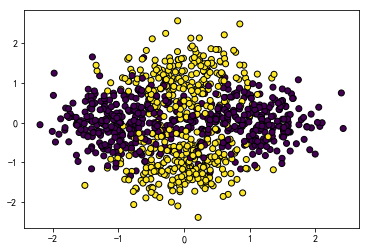

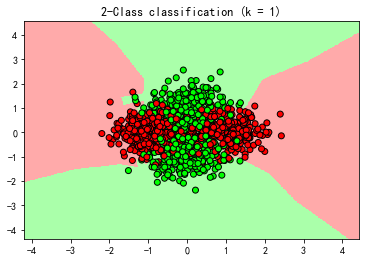

In [13]:
n = 1000
X, y = Data(n, 1, scale=0.5) 
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', c=y)
plt.show()
#原始数据的分类结果
nn = hlp.KNeighborsClassifier_(1)
nn.fit(X, y)
hlp.draw(X, y, nn, n=500, flag=1)

CNN1的算法结果

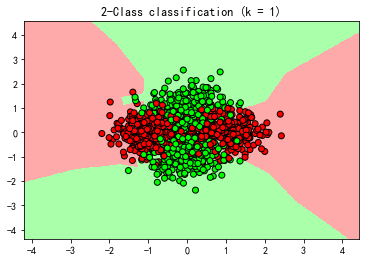

In [14]:
#### CNN1
#condense data的分类结果
X_cd, y_cd = CNN1(X, y)
nn = hlp.KNeighborsClassifier_(1)
nn.fit(X_cd, y_cd)
hlp.draw(X_cd, y_cd, nn, n=500, flag=1)

CNN2的算法结果

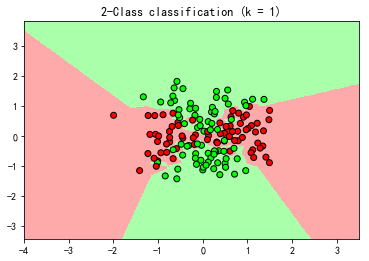

In [15]:
#### CNN2
#condense data的分类结果
X_cd, y_cd = CNN2(X, y)
nn = hlp.KNeighborsClassifier_(1)
nn.fit(X_cd, y_cd)
hlp.draw(X_cd, y_cd, nn, n=500, flag=1)

(c)如果取$\sigma  =0.5$，那么这部分运行时间非常长，不建议运行，不过从之前的例子可以看出，算法2的产生condensed sets集合的元素数量要明显
小于算法1。

In [ ]:
'''
#### 运行时间较长，不建议运行
m = 10
NUM1 = []
NUM2 = []
for i in range(m):
    X, y = Data(n, 1, scale=0.5)
    X_cd1, y_cd1 = CNN1(X, y)
    NUM1.append(len(y_cd1))
    
    X_cd2, y_cd2 = CNN2(X, y)
    NUM2.append(len(y_cd2))
    
plt.hist(NUM1)
plt.title("CNN1")
plt.show()
print("Average sizes of the condensed sets is {}(CNN1)".format(np.mean(NUM1)))

plt.hist(NUM2)
plt.title("CNN2")
plt.show() 
print("Average sizes of the condensed sets is {}(CNN2)".format(np.mean(NUM2)))
'''

#### Problem 6.14 (Page 45)

(a)划分数据

In [16]:
import helper as hlp
import numpy as np

#### (a)
#获得数据
Train = np.genfromtxt("features.train")
Test = np.genfromtxt("features.test")

N = 500
m = 100
y_train, X_train = Train[: N, 0], Train[: N, 1:]
y_train[y_train != 1] = -1
y_test, X_test = Test[: m, 0], Test[: m, 1:]
y_test[y_test != 1] = -1

(b)使用3-NN算法：

Ein of 3-NN is 0.008
Etest of 3-NN is 0.03


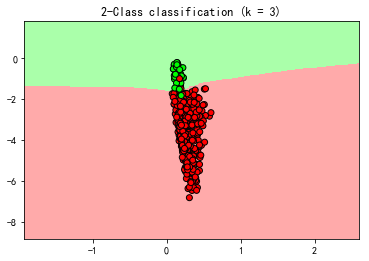

In [17]:
#### (b)
#训练模型
nn = hlp.KNeighborsClassifier_(3)
nn.fit(X_train, y_train)
y_test_pred = nn.predict(X_test)
y_train_pred = nn.predict(X_train)

#计算错误率
ein = np.mean(y_train != y_train_pred)
etest = np.mean(y_test != y_test_pred)
print("Ein of 3-NN is {}".format(ein))
print("Etest of 3-NN is {}".format(etest))
#作图
hlp.draw(X_train, y_train, nn, n=500, flag=1)

(c)使用C-NN

Ein of C-NN is 0.008
Etest of C-NN is 0.03


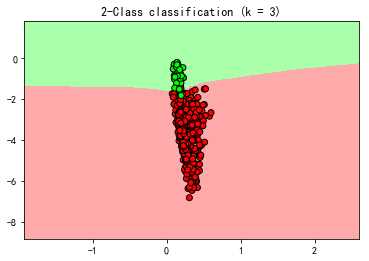

In [18]:
#### (c)
X_cd, y_cd = hlp.CNN(X_train, y_train, k=3)
#训练模型
nn = hlp.KNeighborsClassifier_(3)
nn.fit(X_cd, y_cd)
y_test_pred = nn.predict(X_test)
y_train_pred = nn.predict(X_train)

#计算错误率
ein = np.mean(y_train != y_train_pred)
etest = np.mean(y_test != y_test_pred)
print("Ein of C-NN is {}".format(ein))
print("Etest of C-NN is {}".format(etest))
#作图
hlp.draw(X_cd, y_cd, nn, n=500, flag=1)

(d)重复多次试验，查看评价结果：

In [20]:
#%%time
#### (d)
N = 1000
#索引
train_index = np.arange(Train.shape[0])
test_index = np.arange(Test.shape[0])

Ein_KNN = []
Etest_KNN = []
Ein_CNN = []
Etest_CNN = []

for i in range(N):
    #训练数据
    train = Train[np.random.choice(train_index, size=m, replace=False)]
    y_train, X_train = train[:, 0], train[:, 1:]
    y_train[y_train != 1] = -1
    #测试数据
    test = Test[np.random.choice(test_index, size=n, replace=False)]
    y_test, X_test = test[:, 0], test[:, 1:]
    y_test[y_test != 1] = -1
    
    #训练KNN
    nn = hlp.KNeighborsClassifier_(3)
    nn.fit(X_train, y_train)
    y_test_pred = nn.predict(X_test)
    y_train_pred = nn.predict(X_train)

    #计算错误率
    ein = np.mean(y_train != y_train_pred)
    etest = np.mean(y_test != y_test_pred)
    Ein_KNN.append(ein)
    Etest_KNN.append(etest)
    
    #训练CNN
    X_cd, y_cd = hlp.CNN(X_train, y_train, k=3)
    #训练模型
    nn = hlp.KNeighborsClassifier_(3)
    nn.fit(X_cd, y_cd)
    y_test_pred = nn.predict(X_test)
    y_train_pred = nn.predict(X_train)

    #计算错误率
    ein = np.mean(y_train != y_train_pred)
    etest = np.mean(y_test != y_test_pred)
    Ein_CNN.append(ein)
    Etest_CNN.append(etest)
    
print("meanEin of C-NN is {}".format(np.mean(Ein_CNN)))
print("meanEtest of C-NN is {}".format(np.mean(Etest_CNN)))

print("meanEin of K-NN is {}".format(np.mean(Ein_KNN)))
print("meanEtest of K-NN is {}".format(np.mean(Etest_KNN)))

meanEin of C-NN is 0.05360000000000001
meanEtest of C-NN is 0.05788100000000001
meanEin of K-NN is 0.01168
meanEtest of K-NN is 0.024625000000000005


#### Problem 6.24 (Page 49)

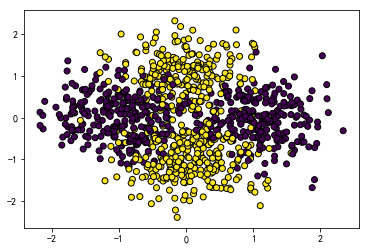

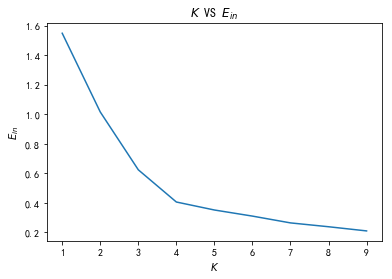

In [22]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 30 11:27:42 2019

@author: qinzhen
"""

import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

#### (a)
n = 1000
X, y = hlp.Data(n, scale=0.5) 
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', c=y)
plt.show()

n = X.shape[0]
K = np.arange(1, 10)
Ein = []
for k in K:
    #训练模型
    kmeans = hlp.KMeans_(k)
    kmeans.fit(X)
    #获得标签
    label = kmeans.labels_
    #获得聚类中心
    center = kmeans.cluster_centers_
    #计算Ein
    ein = 0
    for i in range(k):
        #计算每一类的误差
        ein += np.sum((X[label==i] - center[i]) ** 2)
    #计算均值
    ein /= n
    Ein.append(ein)

#作图
plt.plot(K, Ein)
plt.title("$K$ VS $E_{in}$")
plt.xlabel("$K$")
plt.ylabel("$E_{in}$")
plt.show()


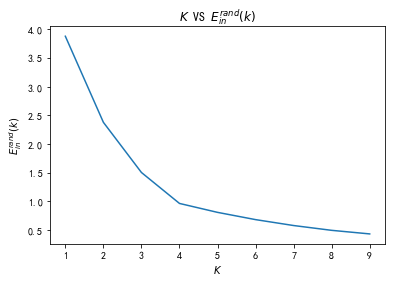

In [25]:
#### (b)
#记录结果
Ein_rand = []
#试验次数
N = 1000

for k in K:
    ein_k = []
    for _ in range(N):
        X, y = hlp.Data(n, scale=0.5) 
        #计算范围
        X1_min = np.min(X[:, 0])
        X1_max = np.max(X[:, 0])
        X2_min = np.min(X[:, 1])
        X2_max = np.max(X[:, 1])
        #生成点
        X1_rand = np.random.uniform(X1_min, X1_max, size=n)
        X2_rand = np.random.uniform(X2_min, X2_max, size=n)
        #合并
        Xrand = np.c_[X1_rand, X2_rand]
        #训练模型
        kmeans = hlp.KMeans_(k)
        kmeans.fit(Xrand)
        #获得标签
        label = kmeans.labels_
        #获得聚类中心
        center = kmeans.cluster_centers_
        #计算Ein
        ein = 0
        for i in range(k):
            #计算每一类的误差
            ein += np.sum((Xrand[label==i] - center[i]) ** 2)
        #计算均值
        ein /= n
        #存储结果
        ein_k.append(ein)
    Ein_rand.append(np.mean(ein_k))
    
plt.plot(K, Ein_rand)
plt.title("$K$ VS $E^{{rand}}_{{in}} (k)$")
plt.xlabel("$K$")
plt.ylabel("$E^{{rand}}_{{in}} (k)$")
plt.show()

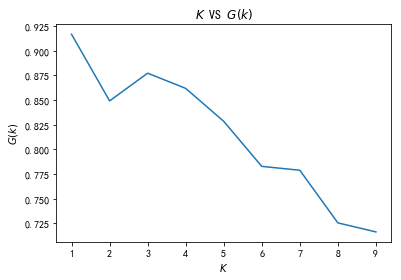

Optimal choice of k is 2


In [38]:
#### (c)
#计算Gk
Gk = np.log(Ein_rand) - np.log(Ein)

#作图
plt.plot(K, Gk)
plt.title("$K$ VS $G(k)$")
plt.xlabel("$K$")
plt.ylabel("$G(k)$")
plt.show()

#最优解
k_opt = K[np.argmin(np.diff(Gk)) + 1]
print("Optimal choice of k is {}".format(k_opt))

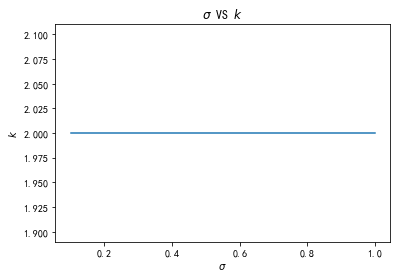

In [39]:
#### (d)
#试验次数
N = 100
Sigma = [0.1, 0.3, 0.5, 0.75, 1]
K_opt = []

for sigma in Sigma:
    #记录结果
    Ein_rand_sigma = []
    for k in K:
        ein_k = []
        for _ in range(N):
            X, y = hlp.Data(n, scale=sigma) 
            #计算范围
            X1_min = np.min(X[:, 0])
            X1_max = np.max(X[:, 0])
            X2_min = np.min(X[:, 1])
            X2_max = np.max(X[:, 1])
            #生成点
            X1_rand = np.random.uniform(X1_min, X1_max, size=n)
            X2_rand = np.random.uniform(X2_min, X2_max, size=n)
            #合并
            Xrand = np.c_[X1_rand, X2_rand]
            #训练模型
            kmeans = hlp.KMeans_(k)
            kmeans.fit(Xrand)
            #获得标签
            label = kmeans.labels_
            #获得聚类中心
            center = kmeans.cluster_centers_
            #计算Ein
            ein = 0
            for i in range(k):
                #计算每一类的误差
                ein += np.sum((Xrand[label==i] - center[i]) ** 2)
            #计算均值
            ein /= n
            #存储结果
            ein_k.append(ein)
        Ein_rand_sigma.append(np.mean(ein_k))
    Gk = np.log(Ein_rand_sigma) - np.log(Ein)
    #记录最优k
    k_opt = K[np.argmin(np.diff(Gk)) + 1]
    K_opt.append(k_opt)

#作图
plt.plot(Sigma, K_opt)
plt.title("$\sigma$ VS $k$")
plt.xlabel("$\sigma$")
plt.ylabel("$k$")
plt.show()